In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
smoothing_param = 5

In [3]:
output_dir = f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/'
file_path = f'{output_dir}kurtosis_skew.csv'
columns = ['event', 'scardec_opt_kurtosis', 'scardec_opt_skew', 'scardec_moy_kurtosis', 'scardec_moy_skew', 'ye_kurtosis', 'ye_skew', 'usgs_kurtosis', 'usgs_skew', 'sigloch_0_kurtosis', 'sigloch_0_skew', 'sigloch_1_kurtosis', 'sigloch_1_skew', 'isc_kurtosis', 'isc_skew']
df = pd.read_csv(file_path, header=None, names=columns)#, header=None)
#df['int_magnitude'] = df['magnitude'].astype(int)

In [4]:
df

,event,scardec_opt_kurtosis,scardec_opt_skew,scardec_moy_kurtosis,scardec_moy_skew,ye_kurtosis,ye_skew,usgs_kurtosis,usgs_skew,sigloch_0_kurtosis,sigloch_0_skew,sigloch_1_kurtosis,sigloch_1_skew,isc_kurtosis,isc_skew
20170818_0259,NaN,0.851212,1.374881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20110126_1542,NaN,-1.024287,-0.080555,-1.339565,0.037534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19981010_1629,NaN,-0.872434,-0.410493,-1.125976,-0.374106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19920730_0824,NaN,-1.355184,0.245664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19960327_2052,NaN,-0.161880,0.415903,-1.170876,0.229181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230206_1024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.053466,1.079799,NaN,NaN,NaN,NaN,NaN,NaN
20231202_1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.244181,-0.426774,NaN,NaN,NaN,NaN,NaN,NaN
19971108_1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.882202,1.295432,NaN,NaN,NaN,NaN,NaN,NaN
20181220_1701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.201694,0.833328,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined_scardec_ye_usgs_sigloch_isc_mag.csv')


In [6]:
df.drop(columns=['event'], inplace=True)

In [7]:
df.index.name = 'event'
df.reset_index(inplace=True)
#df.drop(columns=['event'], inplace=True)

In [8]:
# Convert 'event' column to string type in both dataframes
df['event'] = df['event'].astype(str)
combined['event'] = combined['event'].astype(str)

# Merge the dataframes on the 'event' column
df_2 = df.merge(combined[['event', 'mag']], on='event', how='left')

# Rename the 'mag' column to 'magnitude' in the merged dataframe
df_2.rename(columns={'mag': 'magnitude'}, inplace=True)

df_2

,event,scardec_opt_kurtosis,scardec_opt_skew,scardec_moy_kurtosis,scardec_moy_skew,ye_kurtosis,ye_skew,usgs_kurtosis,usgs_skew,sigloch_0_kurtosis,sigloch_0_skew,sigloch_1_kurtosis,sigloch_1_skew,isc_kurtosis,isc_skew,magnitude
0,20170818_0259,0.851212,1.374881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.591
1,20110126_1542,-1.024287,-0.080555,-1.339565,0.037534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.114
2,19981010_1629,-0.872434,-0.410493,-1.125976,-0.374106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.927
3,19920730_0824,-1.355184,0.245664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.017
4,19960327_2052,-0.161880,0.415903,-1.170876,0.229181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,20230206_1024,NaN,NaN,NaN,NaN,NaN,NaN,-0.053466,1.079799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4531,20231202_1437,NaN,NaN,NaN,NaN,NaN,NaN,-1.244181,-0.426774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4532,19971108_1002,NaN,NaN,NaN,NaN,NaN,NaN,0.882202,1.295432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4533,20181220_1701,NaN,NaN,NaN,NaN,NaN,NaN,-0.201694,0.833328,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_combined = df_2.copy()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cmcrameri.cm as cmc

In [11]:
colors = cmc.batlow(np.linspace(0, 1, 5))
unique_datasets = ['scardec', 'usgs', 'sigloch', 'ye', 'isc']
dataset_colors = {dataset: colors[i] for i, dataset in enumerate(unique_datasets)}

In [23]:
all_kurtosis = []
for kurtosis in ['scardec_opt_kurtosis', 'scardec_moy_kurtosis', 'usgs_kurtosis', 'ye_kurtosis', 'isc_kurtosis', 'sigloch_0_kurtosis']:
	all_kurtosis.append(df_combined[kurtosis].dropna().values)

print(np.mean(np.concatenate(all_kurtosis)))
print(np.std(np.concatenate(all_kurtosis)))

1.9360430085414262
9.801135624110788


In [24]:
non_sigloch_kurtosis = []
for kurtosis in ['scardec_opt_kurtosis', 'scardec_moy_kurtosis', 'usgs_kurtosis', 'ye_kurtosis', 'isc_kurtosis']:
	non_sigloch_kurtosis.append(df_combined[kurtosis].dropna().values)

print(np.mean(np.concatenate(non_sigloch_kurtosis)))
print(np.std(np.concatenate(non_sigloch_kurtosis)))

-0.9520985961995692
0.5624084494710859


In [25]:
print('scardec_opt', np.mean(df_2['scardec_opt_kurtosis']), np.std(df_2['scardec_opt_kurtosis']))
print('scardec_moy', np.mean(df_2['scardec_moy_kurtosis']), np.std(df_2['scardec_moy_kurtosis']))
print('usgs', np.mean(df_2['usgs_kurtosis']), np.std(df_2['usgs_kurtosis']))
print('sigloch', np.mean(df_2['sigloch_0_kurtosis']), np.std(df_2['sigloch_0_kurtosis']))
print('ye', np.mean(df_2['ye_kurtosis']), np.std(df_2['ye_kurtosis']))
print('isc', np.mean(df_2['isc_kurtosis']), np.std(df_2['isc_kurtosis']))

scardec_opt -0.9639668402787946 0.5184088251365213
scardec_moy -0.9708901927332725 0.5912589526853848
usgs -0.7232711589959363 0.7177571306180263
sigloch 25.21900197499909 16.08056078461826
ye -0.8591599784128199 0.5321507365345293
isc -0.6589885338619036 0.5970204995765332


In [26]:
non_sigloch_skew = []
for skew in ['scardec_opt_skew', 'scardec_moy_skew', 'usgs_skew', 'ye_skew', 'isc_skew']:
	non_sigloch_skew.append(df_combined[skew].dropna().values)

print(np.mean(np.concatenate(non_sigloch_skew)))
print(np.std(np.concatenate(non_sigloch_skew)))

0.2416877815936571
0.47247485241879394


In [27]:
all_skew = []
for skew in ['scardec_opt_skew', 'scardec_moy_skew', 'usgs_skew', 'ye_skew', 'isc_skew', 'sigloch_0_skew']:
	all_skew.append(df_combined[skew].dropna().values)

print(np.mean(np.concatenate(all_skew)))
print(np.std(np.concatenate(all_skew)))

0.7376019179706171
1.564949619344886


In [28]:
print('scardec_opt', np.mean(df_2['scardec_opt_skew']), np.std(df_2['scardec_opt_skew']))
print('scardec_moy', np.mean(df_2['scardec_moy_skew']), np.std(df_2['scardec_moy_skew']))
print('usgs', np.mean(df_2['usgs_skew']), np.std(df_2['usgs_skew']))
print('sigloch', np.mean(df_2['sigloch_0_skew']), np.std(df_2['sigloch_0_skew']))
print('ye', np.mean(df_2['ye_skew']), np.std(df_2['ye_skew']))
print('isc', np.mean(df_2['isc_skew']), np.std(df_2['isc_skew']))

scardec_opt 0.1377300887367458 0.47596244884304145
scardec_moy 0.36395030496744 0.43224081955742516
usgs 0.29202168801906225 0.5567079548611628
sigloch 4.735449000398042 1.5580188983278145
ye 0.2538572054561507 0.4571034419751554
isc 0.21509304231903087 0.4316528103988229


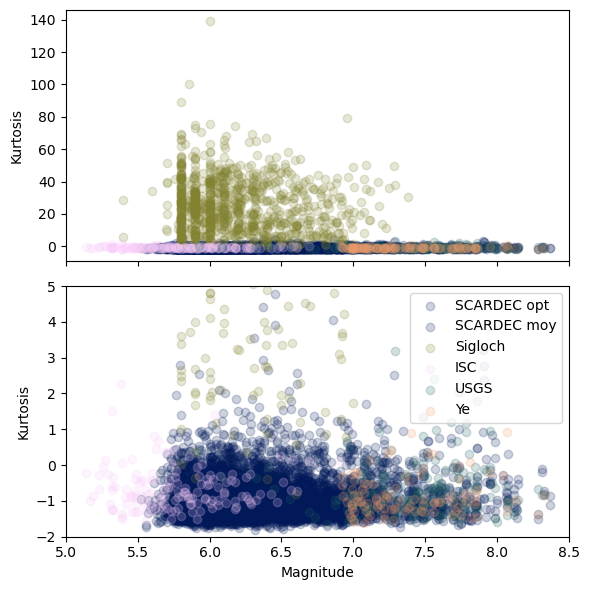

In [138]:
fig, axs = plt.subplots(2, 1, figsize = (6, 6), sharex = True)
axs[0].scatter(df_2['magnitude'], df_2['scardec_opt_kurtosis'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC opt')
axs[0].scatter(df_2['magnitude'], df_2['scardec_moy_kurtosis'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC moy')
axs[0].scatter(df_2['magnitude'], df_2['sigloch_0_kurtosis'],  alpha = 0.2, color = dataset_colors['sigloch'], label = 'Sigloch')
axs[0].scatter(df_2['magnitude'], df_2['isc_kurtosis'],  alpha = 0.2, color = dataset_colors['isc'], label = 'ISC')
axs[0].scatter(df_2['magnitude'], df_2['usgs_kurtosis'],  alpha = 0.2, color = dataset_colors['usgs'], label = 'USGS')
axs[0].scatter(df_2['magnitude'], df_2['ye_kurtosis'],  alpha = 0.2, color = dataset_colors['ye'], label = 'Ye')
axs[1].scatter(df_2['magnitude'], df_2['scardec_opt_kurtosis'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC opt')
axs[1].scatter(df_2['magnitude'], df_2['scardec_moy_kurtosis'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC moy')
axs[1].scatter(df_2['magnitude'], df_2['sigloch_0_kurtosis'],  alpha = 0.2, color = dataset_colors['sigloch'], label = 'Sigloch')
axs[1].scatter(df_2['magnitude'], df_2['isc_kurtosis'],  alpha = 0.2, color = dataset_colors['isc'], label = 'ISC')
axs[1].scatter(df_2['magnitude'], df_2['usgs_kurtosis'],  alpha = 0.2, color = dataset_colors['usgs'], label = 'USGS')
axs[1].scatter(df_2['magnitude'], df_2['ye_kurtosis'],  alpha = 0.2, color = dataset_colors['ye'], label = 'Ye')
axs[1].set_ylim(-2, 5)
axs[1].set_xlim(5, 8.5)
plt.legend()
axs[0].set_ylabel('Kurtosis')
axs[1].set_ylabel('Kurtosis')
axs[1].set_xlabel('Magnitude')
plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/kurtosis_vs_mag.png', dpi = 300, bbox_inches = 'tight')

In [136]:
max(df_2['scardec_opt_kurtosis'])

3.922006360452607

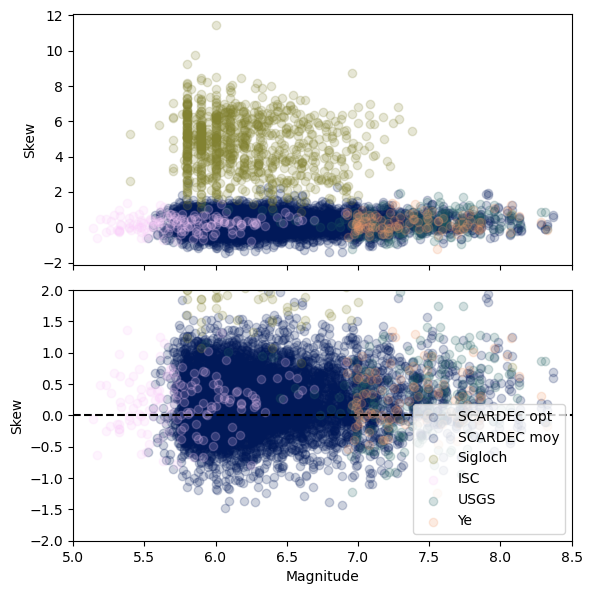

In [140]:
fig, axs = plt.subplots(2, 1, figsize = (6, 6), sharex = True)
axs[0].scatter(df_2['magnitude'], df_2['scardec_opt_skew'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC opt')
axs[0].scatter(df_2['magnitude'], df_2['scardec_moy_skew'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC moy')
axs[0].scatter(df_2['magnitude'], df_2['sigloch_0_skew'],  alpha = 0.2, color = dataset_colors['sigloch'], label = 'Sigloch')
axs[0].scatter(df_2['magnitude'], df_2['isc_skew'],  alpha = 0.2, color = dataset_colors['isc'], label = 'ISC')
axs[0].scatter(df_2['magnitude'], df_2['usgs_skew'],  alpha = 0.2, color = dataset_colors['usgs'], label = 'USGS')
axs[0].scatter(df_2['magnitude'], df_2['ye_skew'],  alpha = 0.2, color = dataset_colors['ye'], label = 'Ye')
axs[1].scatter(df_2['magnitude'], df_2['scardec_opt_skew'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC opt')
axs[1].scatter(df_2['magnitude'], df_2['scardec_moy_skew'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC moy')
axs[1].scatter(df_2['magnitude'], df_2['sigloch_0_skew'],  alpha = 0.2, color = dataset_colors['sigloch'], label = 'Sigloch')
axs[1].scatter(df_2['magnitude'], df_2['isc_skew'],  alpha = 0.2, color = dataset_colors['isc'], label = 'ISC')
axs[1].scatter(df_2['magnitude'], df_2['usgs_skew'],  alpha = 0.2, color = dataset_colors['usgs'], label = 'USGS')
axs[1].scatter(df_2['magnitude'], df_2['ye_skew'],  alpha = 0.2, color = dataset_colors['ye'], label = 'Ye')
axs[1].set_ylim(-2, 2)
axs[1].plot([5, 8.5], [0, 0], 'k--')
axs[1].set_xlim(5, 8.5)
plt.legend()
axs[0].set_ylabel('Skew')
axs[1].set_ylabel('Skew')
axs[1].set_xlabel('Magnitude')
plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/skew_vs_mag.png', dpi = 300, bbox_inches = 'tight')

In [117]:
def myround(x, base=1):
    return base * round(x/base)

In [118]:
catalog = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined_m55_catalog.csv', sep = '|')

In [119]:
cols = catalog.columns
column_names = []
for c in cols:
    column_names.append(c.strip().rstrip().lower())
column_names[0] = 'catalog_id'
catalog.columns = column_names

In [120]:
catalog['year'] = catalog.apply(lambda x: x['time'][:4], axis = 1)
catalog['month'] = catalog.apply(lambda x: x['time'][5:7], axis = 1)
catalog['day'] = catalog.apply(lambda x: x['time'][8:10], axis = 1)
catalog['hour'] = catalog.apply(lambda x: x['time'][11:13], axis = 1)
catalog['minute'] = catalog.apply(lambda x: x['time'][14:16], axis = 1)

catalog['event'] = catalog.apply(lambda x: x['year'] + x['month'] + x['day'] + '_' + x['hour'] + x['minute'], axis = 1)

catalog['int_magnitude'] = catalog.apply(lambda x: myround(x['magnitude']), axis = 1)

In [121]:
catalog.drop(columns = ['contributor', 'contributorid', 'magauthor', 'eventlocationname', 'author', 'catalog', 'time'], inplace = True)

In [122]:
catalog = catalog[['event', 'catalog_id', 'year', 'month', 'day', 'hour', 'minute', 'latitude', 'longitude', 'depth/km', 'magnitude', 'int_magnitude', 'magtype']]

In [123]:
catalog

,event,catalog_id,year,month,day,hour,minute,latitude,longitude,depth/km,magnitude,int_magnitude,magtype
0,20250121_1115,11926233,2025,01,21,11,15,-3.7368,151.5823,10.000,5.5,6,Mww
1,20250121_0605,11926190,2025,01,21,06,05,-27.4829,-13.4632,10.000,5.5,6,mb
2,20250121_0547,11926184,2025,01,21,05,47,13.4344,144.3969,137.242,5.5,6,mww
3,20250120_1617,11926033,2025,01,20,16,17,23.2338,120.4749,10.000,6.0,6,mww
4,20250120_0838,11925968,2025,01,20,08,38,-11.3327,165.8206,35.000,5.6,6,mww
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16101,19900108_1944,2808110,1990,01,08,19,44,52.0105,-169.6001,15.000,5.6,6,mb
16102,19900107_0906,2808066,1990,01,07,09,06,-15.9527,-74.2840,48.900,5.9,6,mb
16103,19900106_2144,2808053,1990,01,06,21,44,-10.6437,92.9744,15.000,5.9,6,mw
16104,19900104_0532,2807962,1990,01,04,05,32,-15.4219,-172.9087,42.600,6.4,6,mb


In [124]:
# Convert 'event' column to string type in both dataframes
df['event'] = df['event'].astype(str)
catalog['event'] = catalog['event'].astype(str)

# Merge the dataframes on the 'event' column
df_3 = df.merge(catalog[['event', 'magnitude', 'depth/km']], on='event', how='left')

# Rename the 'mag' column to 'magnitude' in the merged dataframe
df_3.rename(columns={'mag': 'magnitude'}, inplace=True)

df_3

,event,scardec_opt_kurtosis,scardec_opt_skew,scardec_moy_kurtosis,scardec_moy_skew,ye_kurtosis,ye_skew,usgs_kurtosis,usgs_skew,sigloch_0_kurtosis,sigloch_0_skew,sigloch_1_kurtosis,sigloch_1_skew,isc_kurtosis,isc_skew,magnitude,depth/km
0,20170818_0259,0.851212,1.374881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,10.000
1,20110126_1542,-1.024287,-0.080555,-1.339565,0.037534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,23.800
2,19981010_1629,-0.872434,-0.410493,-1.125976,-0.374106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.8,45.600
3,19920730_0824,-1.355184,0.245664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1,31.400
4,19960327_2052,-0.161880,0.415903,-1.170876,0.229181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,45.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,20230206_1024,NaN,NaN,NaN,NaN,NaN,NaN,-0.053466,1.079799,NaN,NaN,NaN,NaN,NaN,NaN,7.5,10.000
4594,20231202_1437,NaN,NaN,NaN,NaN,NaN,NaN,-1.244181,-0.426774,NaN,NaN,NaN,NaN,NaN,NaN,7.6,50.675
4595,19971108_1002,NaN,NaN,NaN,NaN,NaN,NaN,0.882202,1.295432,NaN,NaN,NaN,NaN,NaN,NaN,7.4,38.100
4596,20181220_1701,NaN,NaN,NaN,NaN,NaN,NaN,-0.201694,0.833328,NaN,NaN,NaN,NaN,NaN,NaN,7.3,16.560


In [125]:
import scipy.stats as stats

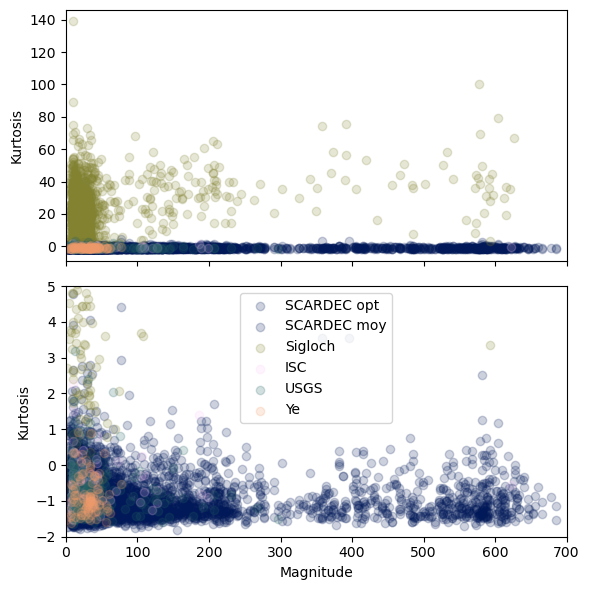

In [141]:
fig, axs = plt.subplots(2, 1, figsize = (6, 6), sharex = True)
axs[0].scatter(df_3['depth/km'], df_3['scardec_opt_kurtosis'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC opt')
axs[0].scatter(df_3['depth/km'], df_3['scardec_moy_kurtosis'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC moy')
axs[0].scatter(df_3['depth/km'], df_3['sigloch_0_kurtosis'],  alpha = 0.2, color = dataset_colors['sigloch'], label = 'Sigloch')
axs[0].scatter(df_3['depth/km'], df_3['isc_kurtosis'],  alpha = 0.2, color = dataset_colors['isc'], label = 'ISC')
axs[0].scatter(df_3['depth/km'], df_3['usgs_kurtosis'],  alpha = 0.2, color = dataset_colors['usgs'], label = 'USGS')
axs[0].scatter(df_3['depth/km'], df_3['ye_kurtosis'],  alpha = 0.2, color = dataset_colors['ye'], label = 'Ye')
axs[1].scatter(df_3['depth/km'], df_3['scardec_opt_kurtosis'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC opt')
axs[1].scatter(df_3['depth/km'], df_3['scardec_moy_kurtosis'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC moy')
axs[1].scatter(df_3['depth/km'], df_3['sigloch_0_kurtosis'],  alpha = 0.2, color = dataset_colors['sigloch'], label = 'Sigloch')
axs[1].scatter(df_3['depth/km'], df_3['isc_kurtosis'],  alpha = 0.2, color = dataset_colors['isc'], label = 'ISC')
axs[1].scatter(df_3['depth/km'], df_3['usgs_kurtosis'],  alpha = 0.2, color = dataset_colors['usgs'], label = 'USGS')
axs[1].scatter(df_3['depth/km'], df_3['ye_kurtosis'],  alpha = 0.2, color = dataset_colors['ye'], label = 'Ye')
axs[1].set_ylim(-2, 5)
axs[1].set_xlim(0, 700)
plt.legend()
axs[0].set_ylabel('Kurtosis')
axs[1].set_ylabel('Kurtosis')
axs[1].set_xlabel('Magnitude')
plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/kurtosis_vs_depth.png', dpi = 300, bbox_inches = 'tight')

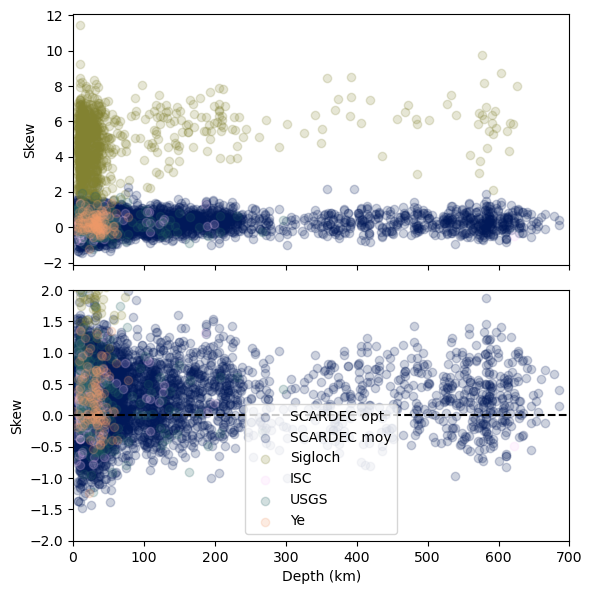

In [143]:
fig, axs = plt.subplots(2, 1, figsize = (6, 6), sharex = True)
axs[0].scatter(df_3['depth/km'], df_3['scardec_opt_skew'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC opt')
axs[0].scatter(df_3['depth/km'], df_3['scardec_moy_skew'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC moy')
axs[0].scatter(df_3['depth/km'], df_3['sigloch_0_skew'],  alpha = 0.2, color = dataset_colors['sigloch'], label = 'Sigloch')
axs[0].scatter(df_3['depth/km'], df_3['isc_skew'],  alpha = 0.2, color = dataset_colors['isc'], label = 'ISC')
axs[0].scatter(df_3['depth/km'], df_3['usgs_skew'],  alpha = 0.2, color = dataset_colors['usgs'], label = 'USGS')
axs[0].scatter(df_3['depth/km'], df_3['ye_skew'],  alpha = 0.2, color = dataset_colors['ye'], label = 'Ye')
axs[1].scatter(df_3['depth/km'], df_3['scardec_opt_skew'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC opt')
axs[1].scatter(df_3['depth/km'], df_3['scardec_moy_skew'],  alpha = 0.2, color = dataset_colors['scardec'], label = 'SCARDEC moy')
axs[1].scatter(df_3['depth/km'], df_3['sigloch_0_skew'],  alpha = 0.2, color = dataset_colors['sigloch'], label = 'Sigloch')
axs[1].scatter(df_3['depth/km'], df_3['isc_skew'],  alpha = 0.2, color = dataset_colors['isc'], label = 'ISC')
axs[1].scatter(df_3['depth/km'], df_3['usgs_skew'],  alpha = 0.2, color = dataset_colors['usgs'], label = 'USGS')
axs[1].scatter(df_3['depth/km'], df_3['ye_skew'],  alpha = 0.2, color = dataset_colors['ye'], label = 'Ye')
axs[1].set_ylim(-2, 2)
axs[1].plot([0, 700], [0, 0], 'k--')
axs[1].set_xlim(0, 700)
plt.legend()
axs[0].set_ylabel('Skew')
axs[1].set_ylabel('Skew')
axs[1].set_xlabel('Depth (km)')
plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/skew_vs_depth.png', dpi = 300, bbox_inches = 'tight')

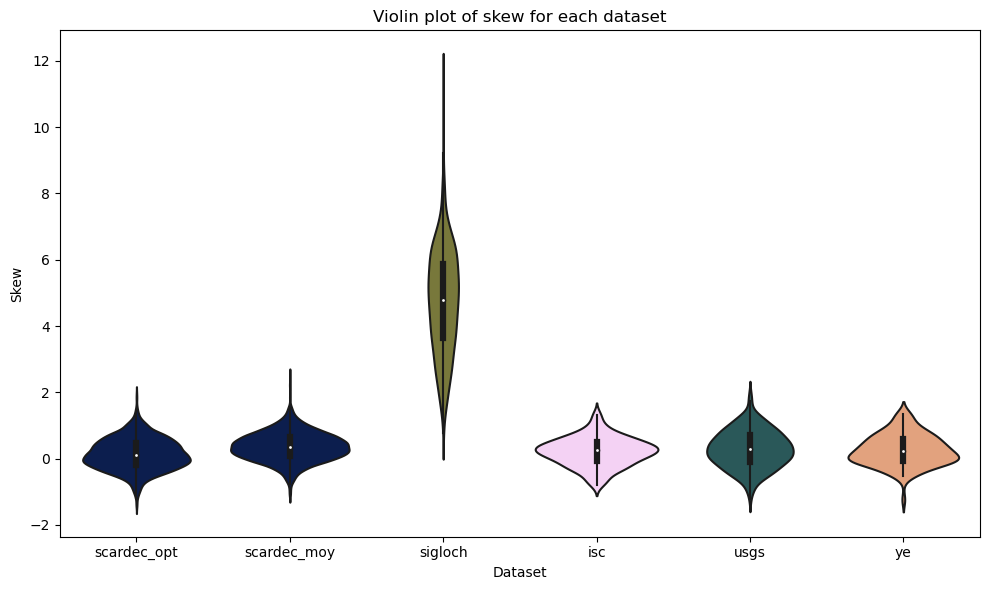

In [144]:
# Add 'scardec_opt' to dataset_colors
dataset_colors['scardec_opt'] = dataset_colors['scardec']
dataset_colors['scardec_moy'] = dataset_colors['scardec']

# Create a new dataframe for the violin plot
df_violin = pd.DataFrame({
	'skew': np.concatenate([
		df_3['scardec_opt_skew'].dropna().values,
		df_3['scardec_moy_skew'].dropna().values,
		df_3['sigloch_0_skew'].dropna().values,
		df_3['isc_skew'].dropna().values,
		df_3['usgs_skew'].dropna().values,
		df_3['ye_skew'].dropna().values
	]),
	'dataset': ['scardec_opt'] * df_3['scardec_opt_skew'].dropna().shape[0] +
			   ['scardec_moy'] * df_3['scardec_moy_skew'].dropna().shape[0] +
			   ['sigloch'] * df_3['sigloch_0_skew'].dropna().shape[0] +
			   ['isc'] * df_3['isc_skew'].dropna().shape[0] +
			   ['usgs'] * df_3['usgs_skew'].dropna().shape[0] +
			   ['ye'] * df_3['ye_skew'].dropna().shape[0]
})

# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='dataset', y='skew', data=df_violin, palette=dataset_colors)
plt.title('Violin plot of skew for each dataset')
plt.xlabel('Dataset')
plt.ylabel('Skew')
plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/violinplot_skew.png', dpi=300, bbox_inches='tight')
plt.show()

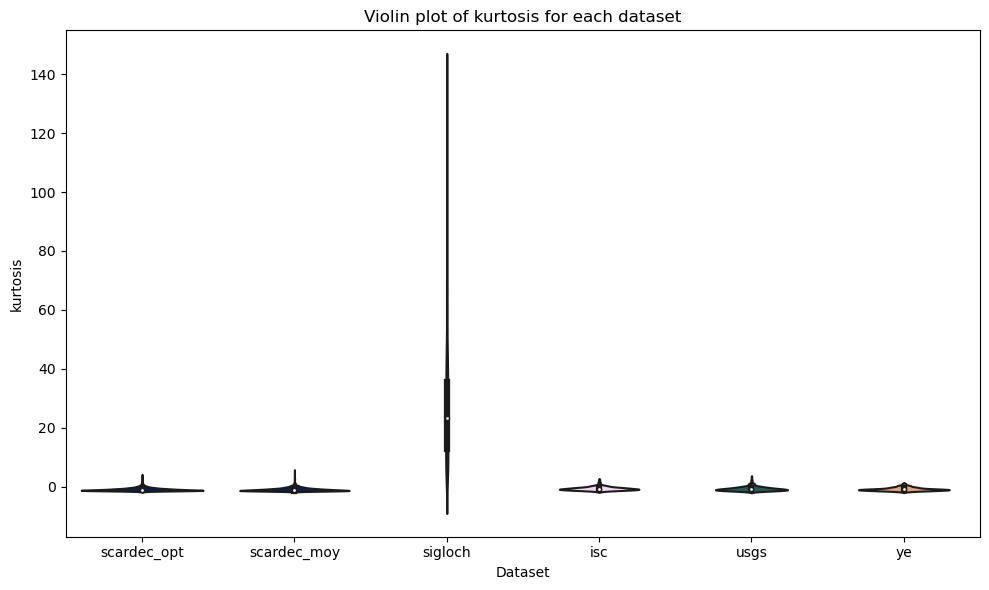

In [152]:
# Add 'scardec_opt' to dataset_colors
dataset_colors['scardec_opt'] = dataset_colors['scardec']
dataset_colors['scardec_moy'] = dataset_colors['scardec']

# Create a new dataframe for the violin plot
df_violin = pd.DataFrame({
	'kurtosis': np.concatenate([
		df_3['scardec_opt_kurtosis'].dropna().values,
		df_3['scardec_moy_kurtosis'].dropna().values,
		df_3['sigloch_0_kurtosis'].dropna().values,
		df_3['isc_kurtosis'].dropna().values,
		df_3['usgs_kurtosis'].dropna().values,
		df_3['ye_kurtosis'].dropna().values
	]),
	'dataset': ['scardec_opt'] * df_3['scardec_opt_kurtosis'].dropna().shape[0] +
			   ['scardec_moy'] * df_3['scardec_moy_kurtosis'].dropna().shape[0] +
			   ['sigloch'] * df_3['sigloch_0_kurtosis'].dropna().shape[0] +
			   ['isc'] * df_3['isc_kurtosis'].dropna().shape[0] +
			   ['usgs'] * df_3['usgs_kurtosis'].dropna().shape[0] +
			   ['ye'] * df_3['ye_kurtosis'].dropna().shape[0]
})

# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='dataset', y='kurtosis', data=df_violin, palette=dataset_colors)
plt.title('Violin plot of kurtosis for each dataset')
plt.xlabel('Dataset')
plt.ylabel('kurtosis')

plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/violinplot_kurtosis.png', dpi=300, bbox_inches='tight')
plt.show()

In [134]:
df_violin

,kurtosis,dataset
0,0.851212,scardec_opt
1,-1.024287,scardec_opt
2,-0.872434,scardec_opt
3,-1.355184,scardec_opt
4,-0.161880,scardec_opt
...,...,...
8642,-1.058939,ye
8643,-1.211425,ye
8644,-0.028164,ye
8645,0.906863,ye
